In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# 'Social_Network_Ads.csv' 파일 읽기 pd.read_csv()
# df shape 확인 


df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 3)

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


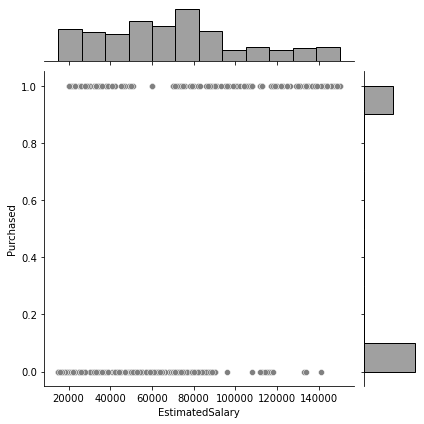

In [5]:
sns.jointplot(x='EstimatedSalary',y='Purchased',data=df,color='gray')

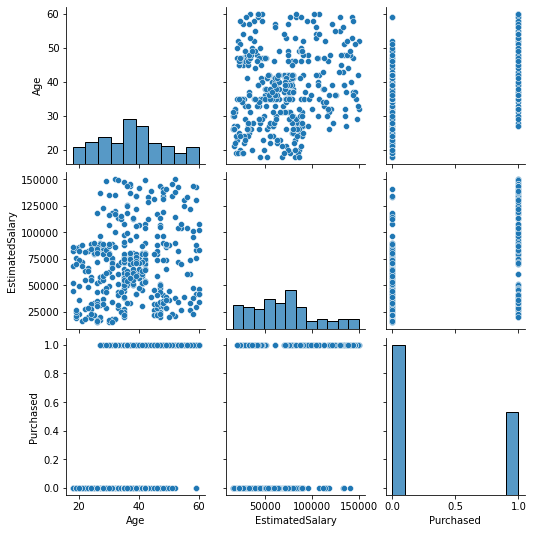

In [6]:
sns.pairplot(df)

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [11]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [12]:
import math
K = int(math.sqrt(X_train.shape[0]))
K


17

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = K, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

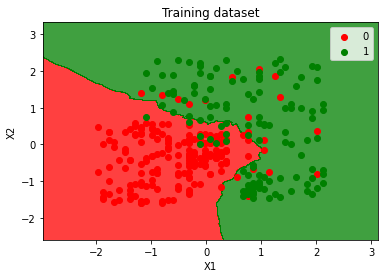

In [39]:
#트레이닝셋 시각화
from matplotlib.colors import ListedColormap

X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:,0].min() - 1, stop = X_grid[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:,1].min() - 1, stop = X_grid[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
               color = ListedColormap(('red','green'))(i),label = j)
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

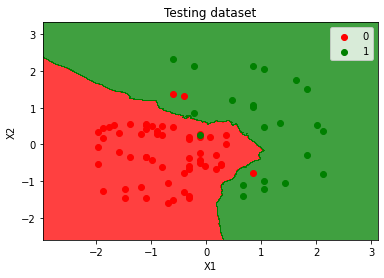

In [41]:
#테스트셋 시각화

from matplotlib.colors import ListedColormap
X_grid,y_grid = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start = X_grid[:,0].min() - 1, stop = X_grid[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_grid[:,1].min() - 1, stop = X_grid[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1], color = ListedColormap(('red','green'))(i),label = j)

plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [42]:
classifier.score(X_train,y_train)

0.909375

In [43]:
classifier.score(X_test,y_test)

0.95

#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

180 19 10 111


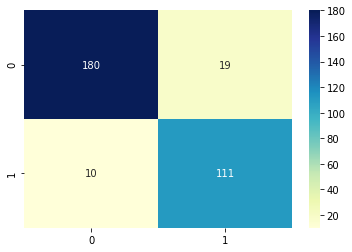

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

y_predict_train  = classifier.predict(X_train)
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm, annot=True, fmt = "d", cmap = 'YlGnBu')
tn,fp,fn,tp = cm.ravel()
print(tn,fp,fn,tp)

55 3 1 21


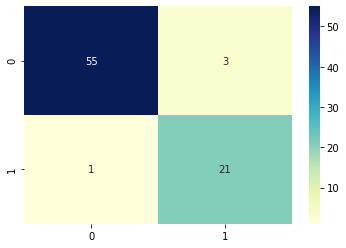

In [47]:
#test set

y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True, fmt="d", cmap = 'YlGnBu')
tn,fp,fn,tp = cm.ravel()
print(tn,fp,fn,tp)

In [48]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

#### Classification Metrics
- precision(정밀도): $\dfrac{TP}{TP + FP}$  
  "모델"이 정답이라고 예측한 것 중에서 "실제로" 정답인 비율.
- recall: $\dfrac{TP}{TP + FN}$  
  "실제로" 정답인 것 중에서 "모델"이 정답인 비율.
- f1-score: $\dfrac{2}{\dfrac{1}{precision} + \dfrac{1}{recall}}$  
  precision, recall 조화평균.  
  두 metric의 평균값.큰 비중 점수가 가지는 bias를 줄임.


#### classification_report
- macro average: averaging the unweighted mean per label
- weighted average: averaging the support-weighted mean per label